In [31]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
class GridBoard:
    def __init__(self, cols, rows):
        self.rows = rows
        self.cols = cols
        self.rewards = pd.DataFrame(np.zeros((rows, cols)))
        self.walls = []
        for w in self.walls:
        # check here to see if walls within the dataframe boundaries
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                    self.show_board[w[0]][w[1]] = "X"

        self.terminals = []  
        
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))

        self.prevq = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # q_table of the ground truth when q-values converge
        self.qtruth = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # v table of where the ground truth of v values converage
        self.vtruth = pd.DataFrame(np.zeros((self.rows, self.cols)))
        self.prevv = pd.DataFrame(np.zeros((self.rows, self.cols)))

        self.key = []
        self.door = []



    
    def assignRewards(self, row, col, reward):
        self.rewards[row][col] = reward
    
    def assignTerminals(self, row, col):
        self.terminals.append([row, col])
    
    def reset_showboard(self):
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))
        for w in self.walls:
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                        self.show_board[w[0]][w[1]] = "X"
    
    def set_walls(self, walls):
        for w in walls:
            self.walls.append(w)
    
    def determineQtruth(self, iters, vBool, take1k):
        print(take1k)
        print(vBool)
        for i in range(0, len(iters)):
            print("qtableBeforeRun")
            print(player.qtable)
            #print("prevqBeforeRun")
            #print(self.prevq)

            run(False, iters[i], None, 1, True, 'ql') 

            print("qtableAfterRun")
            print(player.qtable)
            #print("prevqAfterRun")
            #print(self.prevq)

            print("gets here")
            print(take1k)
            print(vBool)
            print(iters[i])
            if take1k == True:
                if iters[i] == 1000:
                    print(vBool)
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                            print("in there")
                            for i in range(0, len(player.qtable.columns)):
                                for j in range(0, len(player.qtable.index)):                    
                                    v = max(player.qtable[i][j])
                                    self.vtruth[i][j] = v
                    return iters
                
            if i > 0:        
                diffdf = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

                #print("qtable")
                #print(player.qtable)
                #print("prevq")
                #print(self.prevq)

                for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            diffdf[c][r][l] = round(player.qtable[c][r][l] - self.prevq[c][r][l],2)
                print("diffdf")
                print(diffdf)
                #print("qtruth")
                #print(self.qtruth)

                if self.qtruth.equals(diffdf):
                    print("CONVERGENCE!!!")              
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                        print("in there")
                        for i in range(0, len(player.qtable.columns)):
                            for j in range(0, len(player.qtable.index)):                    
                                v = max(player.qtable[i][j])
                                self.vtruth[i][j] = v

                    return(iters)
                
                #done = False
                #for c in range(0, len(player.diffdf.columns)):
                #    for r in range(0, len(player.diffdf.index)):
                        

            
            for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            self.prevq[c][r][l] = player.qtable[c][r][l]
            

            #self.prevq = player.qtable.copy()
            #print('Prevq')
            #print(self.prevq)





In [33]:
class Player:
    def __init__(self, grid, start):
        self.start = start
        self.curr_state = self.start[:]
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = "*"
        self.policy = pd.DataFrame(0, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.v = pd.DataFrame(np.zeros((grid.rows, grid.cols)))
        self.vtable = pd.DataFrame(np.zeros((grid.rows, grid.cols)))

        # q_tables are a list within a dataframe cell with the directions [North, East, South, West], always start at 0
        self.qtable = pd.DataFrame([[[0, 0, 0, 0] for j in range(grid.cols)] for i in range(grid.rows)], index=range(grid.rows), columns=range(grid.cols))

        self.gotkey = False
        self.gotdoor = False


    
    def move(self, direct):
        # determine if a move can occur
        # possible values for act: N, S, E, W
        # need next_state to find walls

        if direct == 'N':
            next_state = [self.curr_state[0], self.curr_state[1]-1]
            if self.curr_state[1] != 0 and next_state not in grid.walls: self.curr_state[1] -= 1 

        elif direct == 'E':
            next_state = [self.curr_state[0]+1, self.curr_state[1]]
            if next_state[0] < grid.cols and next_state not in grid.walls: self.curr_state[0] += 1 

        elif direct == 'S':
            next_state = [self.curr_state[0], self.curr_state[1]+1]
            if next_state[1] < grid.rows and next_state not in grid.walls: self.curr_state[1] += 1 

        elif direct == 'W':
            next_state = [self.curr_state[0]-1, self.curr_state[1]]
            if self.curr_state[0] != 0 and next_state not in grid.walls: self.curr_state[0] -= 1 

        else:
            print("Invalid option")

        grid.reset_showboard()
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = '*'
    
    def detNextState(self, curr_state, direct):

        if direct == 'N': next_state = [self.curr_state[0], self.curr_state[1]-1]
        elif direct == 'E': next_state = [self.curr_state[0]+1, self.curr_state[1]]
        elif direct == 'S': next_state = [self.curr_state[0], self.curr_state[1]+1]
        elif direct == 'W': next_state = [self.curr_state[0]-1, self.curr_state[1]]
        else: print("Invalid option")
        
        return next_state    
    
    def findRandDirection(self):
        d = random.randint(1,4)
        if d == 1: return 'N'
        elif d == 2: return 'E'
        elif d == 3: return 'S'
        elif d == 4: return 'W'
        else:
            print("out of bounds")
        
    def detPolicyV(self):
        # determine policy & V table
        for i in range(0, len(player.policy.columns)):
            for j in range(0, len(player.policy.index)):
                dir = player.qtable[i][j].index(max(player.qtable[i][j]))         
                dirv = getDirChar(dir)
                player.policy[i][j] = dirv
                
                v = max(player.qtable[i][j])
                player.v[i][j] = v
            


In [34]:
class QLearn:
    def __init__(self, gamma, lr, deterministic):
        self.gamma = gamma
        self.deterministic = deterministic
        if not deterministic:
            self.lr = lr
        else:
            self.lr = 1
    
    def findQhat(self, rewards, qtable, cs, ns, d):
        qhat = 0
        if self.deterministic == True:
            if ns not in grid.walls:
                qhat = rewards[ns[0]][ns[1]] + self.gamma * max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3])
        else:
            if ns not in grid.walls:
                qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
                    self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
                    max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3]))

        return qhat
    
    def findSarsa(self, rewards, qtable, cs, ns, d):
        # difference with Sarsa is it follows a policy premade
        qhat = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * qtable[ns[0]][ns[1]][nextDir])
            
        return qhat

    def findV(self, rewards, qtable, cs, ns, d):
        # used for TD
        v = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            v = player.vtable[cs[0]][cs[1]] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * (player.vtable[ns[0]][ns[1]] - player.vtable[cs[0]][cs[1]]))
            
        return v

In [35]:
class Charts():
    def __init__(self, episodes):
        self.stepsGoal = pd.DataFrame(0, columns=['Steps'], index=range(1, episodes+1))
        self.stepsGoal.index.name = 'Episodes'
        self.sse = pd.DataFrame(0, columns=['SSE'], index=range(1, episodes+1))

        self.stepsKey = pd.DataFrame(0, columns=['Key', 'Door', 'Goal'], index=range(1, episodes+1))

    
    def determineSSE(self, type):
        if type == 'q':
            truth = grid.qtruth
            pred = player.qtable
        else:
            truth = grid.vtruth
            pred = player.vtable

        truthList = []
        currentPred = []
        sseVal = 0

        #print("inside vtruth")
        #print(grid.vtruth)
        #print("inside vtable")
        #print(player.vtable)

        # convert the DF of lists into a big list per DF
        for c in range(0, len(truth.columns)):
            for r in range(0, len(truth.index)):
                truthList.append(truth[c][r])

        for c in range(0, len(pred.columns)):
            for r in range(0, len(pred.index)):
                currentPred.append(pred[c][r])
            
        #print("truthList")
        #print(truthList)
        #print("currentPred")
        #print(currentPred)

        if type == 'q':
            truthList = [j for i in truthList for j in i]
            currentPred = [j for i in currentPred for j in i]

        #print("truthList")
        #print(truthList)
        #print("currentPred")
        #print(currentPred)

        for t in range(0, len(truthList)):
            sseVal += (truthList[t] - currentPred[t])**2
        
        #print("sse")
        #print(sseVal)

        return sseVal

In [36]:
# function to create gridboard, set up walls & boundaries and assign rewards
# recieves: columns, rows, arewards array for rewards
def setupGrid(columns, rows, arewards, aterminals, key, door):
    grid = GridBoard(columns, rows)
    grid.key = key
    grid.door = door
    
    # create walls and boundaries, treat out of bounds as walls
    for c in range(0, grid.cols):
        grid.walls.append([c, -1])
        grid.walls.append([c, grid.rows])
    for r in range(0, grid.rows):
        grid.walls.append([-1, r])
        grid.walls.append([grid.cols, r])

    #print(grid.walls)

    for reward in arewards:
        grid.assignRewards(reward[0], reward[1], reward[2])
    
    for terminal in aterminals:
        grid.assignTerminals(terminal[0], terminal[1])
    
    #print(grid.terminals)

    return grid

In [37]:
def getDirInt(direct):
    d = 0
    if direct == 'N': d = 0
    elif direct == 'E': d = 1
    elif direct == 'S': d = 2
    elif direct == 'W': d = 3
    return d

def getDirChar(direct):
    d = ''
    if direct == 0: d = 'N'
    elif direct == 1: d = 'E'
    elif direct == 2: d = 'S'
    elif direct == 3: d = 'W'
    return d

In [42]:
# receives: pdef (if predefined path or not), iterations, path (none if not predefined)
def run(pdef, iters, path, eps, getQtruth, alg):
   
    if pdef == False:
        for i in range(0, iters):
            stepCount = 0
            stepsToKey = 0
            stepsToDoor = 0
            stepsToGoal = 0
            while player.curr_state not in grid.terminals:
                x = player.curr_state[0]
                y = player.curr_state[1]

                p = np.random.random()
                if p < (1-eps):
                    if player.policy[x][y] != 0:
                        direct = player.policy[x][y]
                    else: 
                        direct = player.findRandDirection()
                else: # random
                    direct = player.findRandDirection()

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                if alg == 'ql':
                    qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'sarsa':
                    qhat = qlearn.findSarsa(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'td':
                    vhat = qlearn.findV(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    vhat = round(vhat, 2)
                    player.vtable[x][y] = vhat                 

                player.move(direct)
                stepCount += 1  
                
                #if getQtruth == False: 
                #    print(stepCount)           

                #print(player.curr_state)
                
                #print(grid.walls)     

                #if grid.door is not None:
                    #if player.curr_state == grid.door:
                        #print("In the door")
                        #print(direct)
                        #print(grid.show_board)     

                    
                if player.curr_state == grid.key:
                    player.gotkey = True
                    #print("Got the key")
                    #print(stepsToKey)
                    #print(grid.show_board)     

                    #print(grid.door)
                    #print(grid.walls)
                    if grid.door in grid.walls:
                        grid.walls.remove(grid.door)
                    #print(grid.walls) 

                #print(stepsToDoor)    
                
                if player.curr_state == grid.door:
                    player.gotdoor = True
                    #rint("Got the Door")
                
                #print(stepsToDoor) 


                if getQtruth == False:
                    # update the steps goal df
                    charts.stepsGoal['Steps'][i+1] = stepCount
                    if player.gotkey == False:
                        #print("in got key")                        
                        stepsToKey += 1

                    if player.gotdoor == False:
                        #print("in got door")                        
                        stepsToDoor += 1



            if getQtruth == False:
                # determine the new policy and V table
                if alg == 'ql':
                    player.detPolicyV()


                # get SSE
                #print(i)
                #print(charts.sse)
                if alg == 'td':
                    charts.sse['SSE'][i+1] = charts.determineSSE('v')
                else:
                    charts.sse['SSE'][i+1] = charts.determineSSE('q')


                charts.stepsKey['Key'][i+1] = stepsToKey
                #print('here')
                #print(stepsToKey)
                #print(stepsToDoor)
                trueStepsToDoor = stepsToDoor - stepsToKey
                charts.stepsKey['Door'][i+1] = trueStepsToDoor
                #print(charts.stepsKey['Door'][i+1])
                charts.stepsKey['Goal'][i+1] = stepCount - (trueStepsToDoor + stepsToKey) 


            # move player back to start position
            player.curr_state = player.start[:]
            # reset door
            if grid.door is not None:
                grid.walls.append(grid.door)
                player.gotkey = False
                player.gotdoor = False
            print(i, end=' ')
            #print(i)
            #print("after in Run: prevq")
            #print(grid.prevq)
            #print("after in Run: qtable")
            #print(player.qtable)   
        player.qtable = player.qtable.round(2)
        player.vtable = player.vtable.round(2)
               
        #print("each iteration vtable")
        #print(player.vtable)
        #print("each iteration qtable")
        #print(player.qtable)

    
    else:   
        for t in path:            
            for direct in t:
                x = player.curr_state[0]
                y = player.curr_state[1]

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)

                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

                #print(player.curr_state)
                #print(grid.show_board)
            player.curr_state = player.start[:]

        player.qtable = player.qtable.round(2)

In [27]:
# Non-deterministic Homework example
aRewards = [[0, 2, 25], [1, 2, -100], [1, 0, -80], [2, 2, 80], [2, 0, 100]]
aTerminals = [[0, 2], [1, 2], [1, 0], [2, 2], [2, 0]]

grid = setupGrid(3, 3, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

player = Player(grid, [0, 0])

iters = 10

print(player.curr_state)
print(grid.show_board)

path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

run(True, iters, path, 0.1, False, 'ql')
#print(player.qtable)
print(grid.show_board)

#plt.figure()
#g1 = sns.lineplot(data=charts.stepsGoal)
#plt.figure()
#g2 = sns.lineplot(data=charts.sse)







   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  .  .
2  *  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  *  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .

CONVERGENCE!!!
                    0                       1                 2
0  [0, 90.0, 72.9, 0]  [0, 100.0, 81.0, 81.0]      [0, 0, 0, 0]
1  [81.0, 81.0, 0, 0]       [90.0, 0.0, 0, 0]  [100.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .


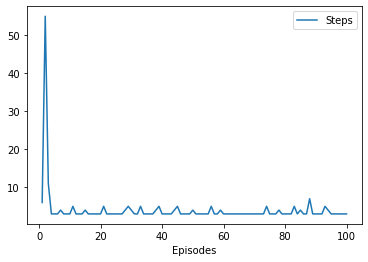

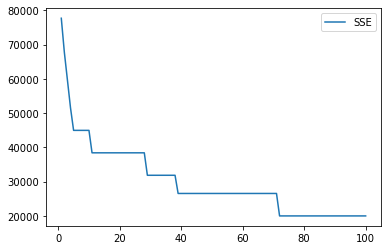

In [41]:
# Deterministic In class example
aRewards = [[2, 0, 100]]
aTerminals = [[2, 0]]

grid = setupGrid(3, 2, aRewards, aTerminals, None, None)
player = Player(grid, [0, 1])
qlearn = QLearn(0.9, None, True)

itersTruth = [50, 60, 70]
grid.determineQtruth(itersTruth, False, False)

iters = 100
player = Player(grid, [0, 1])
charts = Charts(iters)

#print(player.curr_state)
#print(grid.show_board)

run(False, iters, None, 0.1, False, 'ql')
print(player.qtable)
print(grid.show_board)

player.detPolicyV()


plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

False
False
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 qtableAfterRun
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                  

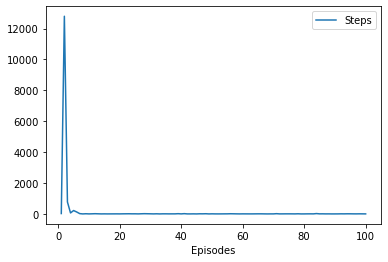

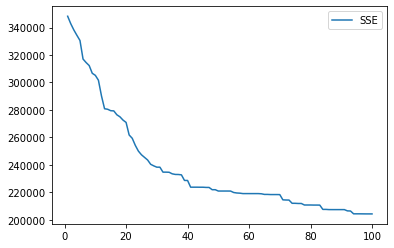

In [110]:
# finding the ground truth by determining at what level of iteration the diffences in the 
# qtables becoes small enough to conclude ground truth: using that as basis for 
# sum of squared errors calculation.

# QLearning Non-deterministic example
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)
#charts = Charts(runiters[i])

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

qlsteps = charts.stepsGoal[:]
qlsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=qlsteps)
plt.figure()
g2 = sns.lineplot(data=qlsse)

    

    


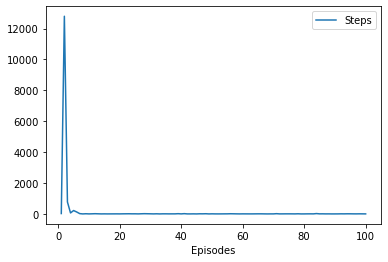

In [111]:
plt.figure()
g1 = sns.lineplot(data=qlsteps)

qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 qtableAfterRun
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                            2 

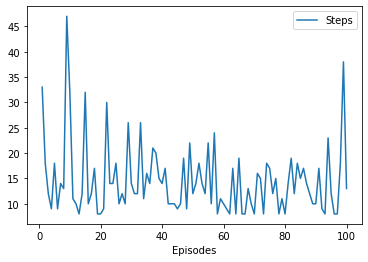

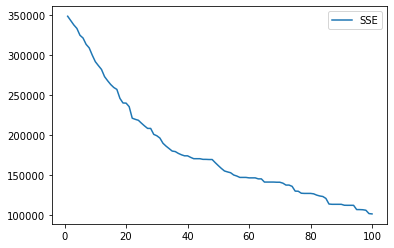

In [66]:
# SARSA
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    #player.detPolicyV()

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)


    

    


qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 qtableAfterRun
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3  

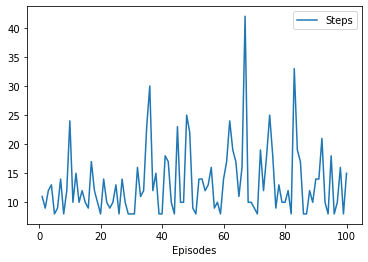

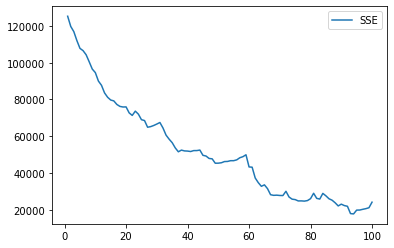

In [70]:
# TD prediction
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100
#print(player.v)

itersTruth = [100, 200, 500, 900]

grid.determineQtruth(itersTruth, True, False)

#print("vtruth")
#print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)

tdsteps = charts.stepsGoal[:]
tdsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)



[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 1], [2, 2], [2, 3]]
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 qtableAfterRun
                          0                         1                     2  \
0      [0, 47.81, 47.81, 0]  [0, 53.13, 53.13, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 0, 59.0

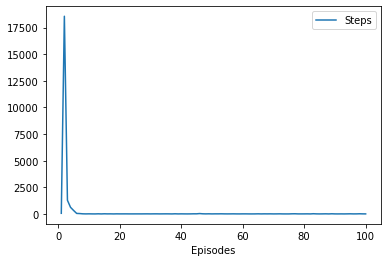

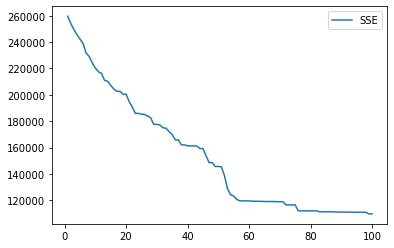

In [58]:
# QLearning Non-deterministic example with walls and 2 openings
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)



plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 1], [2, 2], [2, 3], [2, 4]]
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 qtableAfterRun
                          0                         1                     2  \
0      [0, 47.81, 38.71, 0]  [0, 53.13, 43.02, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 43.02, 34.83, 0]  [47.81,

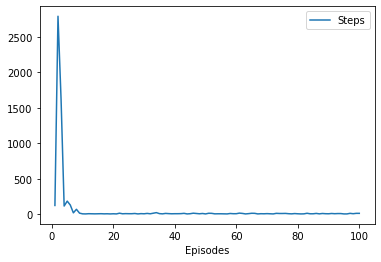

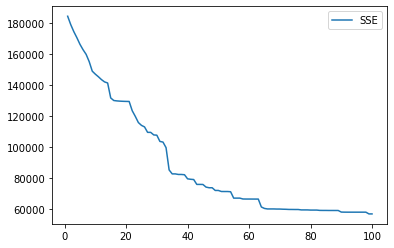

In [59]:
# QLearning Non-deterministic example with walls and one opening
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

qlwsteps = charts.stepsGoal[:]
qlwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 1], [2, 2], [2, 3], [2, 4]]
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 qtableAfterRun
                          0                         1                     2  \
0      [0, 47.81, 38.71, 0]  [0, 53.13, 43.02, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 43.02, 34.83, 0]  [47.81,

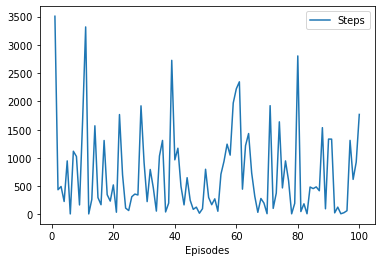

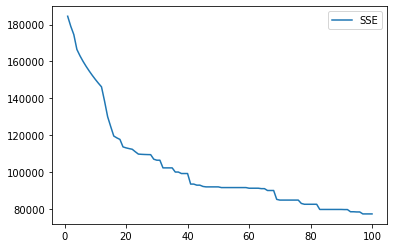

In [60]:
# SARSA with wall with one opening
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.1, False, 'sarsa')

    print(grid.show_board)

    #player.detPolicyV()

    print(player.policy)

sarwsteps = charts.stepsGoal[:]
sarwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)


    

    


qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 qtableAfterRun
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3  

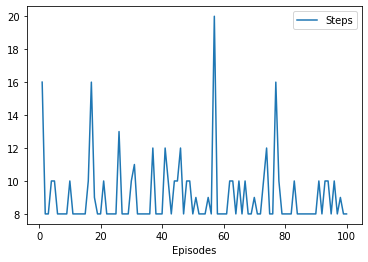

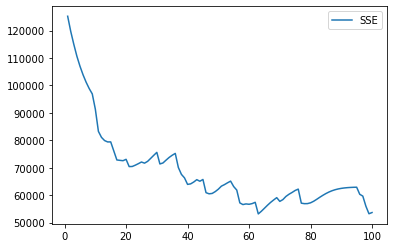

In [61]:
# TD prediction with walls and one opening
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100
#print(player.v)

itersTruth = [100, 200, 500, 1000]

grid.determineQtruth(itersTruth, True, False)

#print("vtruth")
#print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.1, False, 'td')

    print(grid.show_board)

tdwsteps = charts.stepsGoal[:]
tdwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)



[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
True
False
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 

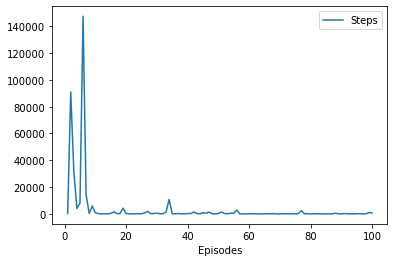

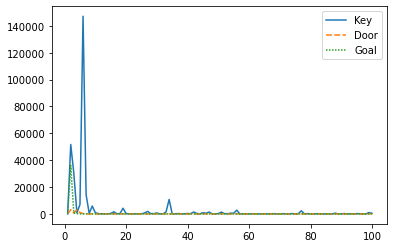

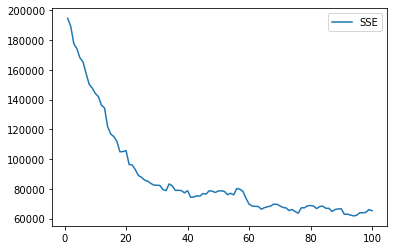

In [51]:
# QLearning Non-deterministic example with walls and with key and door
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    #path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

    #run(True, iters, path, 0.1, False, 'ql')

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    print(charts.stepsKey)

qlkeysteps = charts.stepsGoal[:]
qlkeysse = charts.sse[:]
qlkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=qlkeysteps)
plt.figure()
g2 = sns.lineplot(data=qlkey)
plt.figure()
g3 = sns.lineplot(data=qlkeysse)

    

    


In [57]:
print(qlkey)
print(qlkeysteps)
# 50% is the median
print(qlkey.describe())
print(qlkeysteps.describe())


       Key  Door   Goal
1       23    33    296
2    51697  3140  36104
3    30301   792    607
4      860  2982    270
5     6962  1017     15
..     ...   ...    ...
96     143    14      6
97      44     8      5
98      11   104      5
99    1003     4      9
100    448   246      5

[100 rows x 3 columns]
          Steps
Episodes       
1           352
2         90941
3         31700
4          4112
5          7994
...         ...
96          163
97           57
98          120
99         1016
100         699

[100 rows x 1 columns]
                 Key         Door         Goal
count     100.000000   100.000000    100.00000
mean     3013.170000   104.900000    380.07000
std     15825.539331   444.359953   3609.17584
min         4.000000     4.000000      5.00000
25%        47.750000     5.000000      5.00000
50%       141.000000    11.500000      7.00000
75%       511.000000    33.000000     10.00000
max    147161.000000  3140.000000  36104.00000
               Steps
count     10

[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
True
False
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 

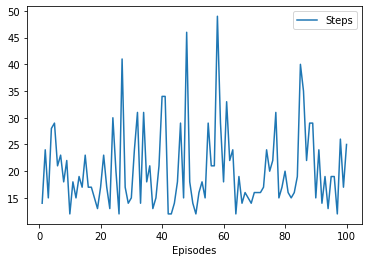

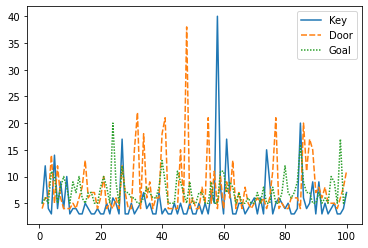

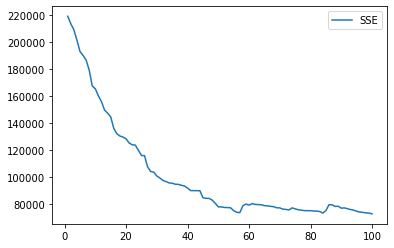

In [52]:
# SARSA with wall with door, key
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    #p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    p = [['S', 'W', 'X', 'S', 'S'], ['S', 'W', 'X', 'S', 'S'], ['S', 'E', 'E', 'E', 'S'], ['S', 'N', 'X', 'E', 'S'], ['E', 'N', 'X', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    #player.detPolicyV()

    print(player.policy)

sarkeysteps = charts.stepsGoal[:]
sarkeysse = charts.sse[:]
sarkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=sarkeysteps)
plt.figure()
g2 = sns.lineplot(data=sarkey)
plt.figure()
g3 = sns.lineplot(data=sarkeysse)


    

    

    

    


In [58]:
print(sarkey)
print(sarkeysteps)

# 50% is the median
print(sarkey.describe())
print(sarkeysteps.describe())

     Key  Door  Goal
1      5     4     5
2     12     6     6
3      4     6     5
4      3    14    11
5     14     5    10
..   ...   ...   ...
96     5     5     9
97     3     4     5
98     3     6    17
99     4     8     5
100    7    11     7

[100 rows x 3 columns]
          Steps
Episodes       
1            14
2            24
3            15
4            28
5            29
...         ...
96           19
97           12
98           26
99           17
100          25

[100 rows x 1 columns]
              Key        Door        Goal
count  100.000000  100.000000  100.000000
mean     5.450000    7.790000    7.240000
std      4.759626    5.534638    2.745501
min      3.000000    4.000000    5.000000
25%      3.000000    4.000000    5.000000
50%      4.000000    6.000000    7.000000
75%      5.000000    8.250000    8.250000
max     40.000000   38.000000   20.000000
            Steps
count  100.000000
mean    20.480000
std      7.625688
min     12.000000
25%     15.000000
50%   

[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
True
True
qtableBeforeRun
                          0                            1                   2  \
0      [0, 17.07, 25.94, 0]             [0, 0, 0, 23.17]        [0, 0, 0, 0]   
1  [18.61, 21.24, 31.71, 0]       [0.0, 0, 35.98, 16.91]        [0, 0, 0, 0]   
2  [19.68, 43.42, 37.56, 0]  [21.15, 65.6, 51.82, 31.85]  [0, 72.9, 0, 56.1]   
3  [21.75, 44.29, 42.66, 0]     [59.04, 0, 40.89, 33.43]        [0, 0, 0, 0]   
4      [28.18, 47.72, 0, 0]         [53.12, 0, 0, 35.76]        [0, 0, 0, 0]   

                             3                         4  
0                 [0, 0, 0, 0]           [0, 0, 9.11, 0]  
1             [0, 0, 71.19, 0]        [0.0, 0, 80.48, 0]  
2  [55.87, 81.0, 80.56, 65.36]    [69.1, 0, 90.0, 72.89]  
3          [63.79, 90.0, 0, 0]  [80.96, 0, 100

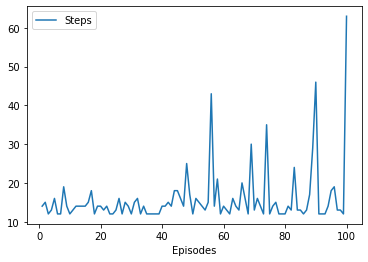

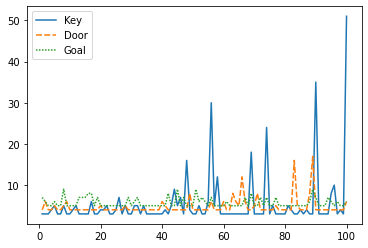

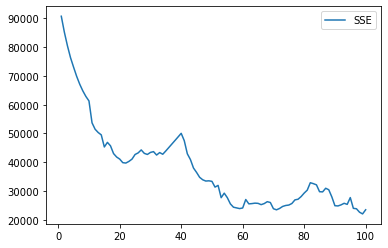

In [53]:
# TD prediction with walls, key, door
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100
#print(player.v)

itersTruth = [1000]

grid.determineQtruth(itersTruth, True, True)

print("vtruth")
print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):

    #p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    p = [['S', 'W', 'X', 'S', 'S'], ['S', 'W', 'X', 'S', 'S'], ['S', 'E', 'E', 'E', 'S'], ['S', 'N', 'X', 'E', 'S'], ['E', 'N', 'X', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.1, False, 'td')

    print(grid.show_board)

tdkeysteps = charts.stepsGoal[:]
tdkeysse = charts.sse[:]
tdkey = charts.stepsKey

plt.figure()
g1 = sns.lineplot(data=tdkeysteps)
plt.figure()
g2 = sns.lineplot(data=tdkey)
plt.figure()
g3 = sns.lineplot(data=tdkeysse)



In [59]:
print(tdkey)
print(tdkeysteps)

# 50% is the median
print(tdkey.describe())
print(tdkeysteps.describe())


     Key  Door  Goal
1      3     4     7
2      3     6     6
3      3     4     5
4      4     4     5
5      5     5     6
..   ...   ...   ...
96    10     4     5
97     3     4     6
98     4     4     5
99     3     4     5
100   51     6     6

[100 rows x 3 columns]
          Steps
Episodes       
1            14
2            15
3            12
4            13
5            16
...         ...
96           19
97           13
98           13
99           12
100          63

[100 rows x 1 columns]
              Key        Door        Goal
count  100.000000  100.000000  100.000000
mean     5.360000    4.740000    5.700000
std      6.848313    2.077392    1.123666
min      3.000000    4.000000    5.000000
25%      3.000000    4.000000    5.000000
50%      3.000000    4.000000    5.000000
75%      5.000000    4.000000    6.000000
max     51.000000   17.000000    9.000000
            Steps
count  100.000000
mean    15.800000
std      7.434563
min     12.000000
25%     12.000000
50%   

(0.0, 1851.0)

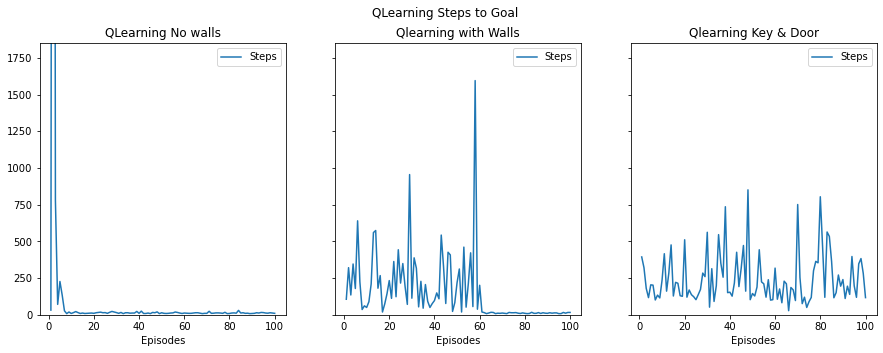

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('QLearning Steps to Goal')

# QL without walls
sns.lineplot(ax=axes[0], data=qlsteps)
#sns.lineplot(ax=axes[1, 0], data=qlsse)
axes[0].set_title("QLearning No walls")
axes[0].set_ylim([0, max(qlsteps['Steps'])+1000])
#axes[1, 0].set_title("Qlearning SSE (no walls)")
#axes[1, 0].set_ylim([19000, max(qlsse['SSE'])])

# QL with walls, one opening
sns.lineplot(ax=axes[1], data=qlwsteps)
#sns.lineplot(ax=axes[1, 1], data=qlwsse)
axes[1].set_title("Qlearning with Walls")
axes[1].set_ylim([0, max(qlwsteps['Steps'])+1000])
#axes[1, 1].set_title("Qlearning SSE (walls)")

# QL with key, door
sns.lineplot(ax=axes[2], data=qlkeysteps)
#sns.lineplot(ax=axes[1, 2], data=qlkeysse)
axes[2].set_title("Qlearning Key & Door")
axes[2].set_ylim([0, max(qlkeysteps['Steps'])+1000])
#axes[1, 2].set_title("Qlearning SSE (key,door)")





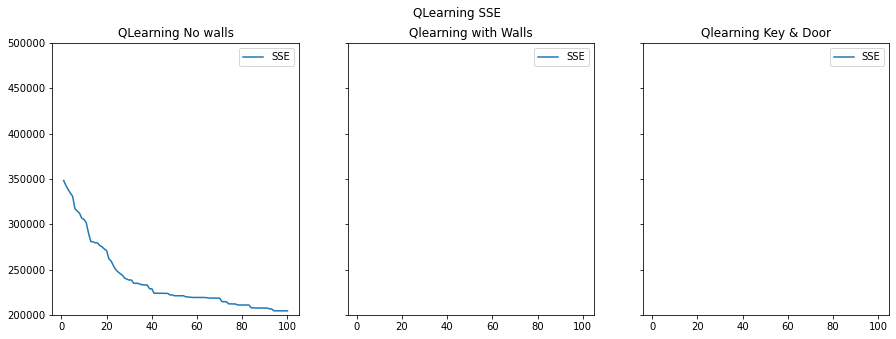

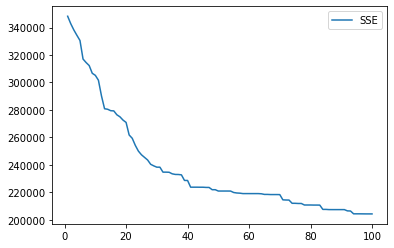

In [150]:
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig2.suptitle('QLearning SSE')

# QL without walls
sns.lineplot(ax=axes2[0], data=qlsse)
#sns.lineplot(ax=axes[1, 0], data=qlsse)
axes2[0].set_title("QLearning No walls")
axes2[0].set_ylim([200000, 500000])
#axes[1, 0].set_title("Qlearning SSE (no walls)")
#axes[1, 0].set_ylim([19000, max(qlsse['SSE'])])

# QL with walls, one opening
sns.lineplot(ax=axes2[1], data=qlwsse)
#sns.lineplot(ax=axes[1, 1], data=qlwsse)
axes2[1].set_title("Qlearning with Walls")
#axes2[1].set_ylim([min(qlwsse['SSE']), max(qlwsse['SSE'])])
#axes[1, 1].set_title("Qlearning SSE (walls)")

# QL with key, door
sns.lineplot(ax=axes2[2], data=qlkeysse)
#sns.lineplot(ax=axes[1, 2], data=qlkeysse)
axes2[2].set_title("Qlearning Key & Door")
#axes2[2].set_ylim([0, max(qlkeysse['SSE'])])
#axes[1, 2].set_title("Qlearning SSE (key,door)")

plt.figure()
g3 = sns.lineplot(data=qlsse)

In [103]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sarsa')

# Sarsa without walls
sns.lineplot(ax=axes[0, 0], data=sarsteps)
sns.lineplot(ax=axes[1, 0], data=sarsse)
axes[0, 0].set_title("Sarsa Steps to Goal (no walls)")
axes[1, 0].set_titles("Sarsa SSE (no walls)")

# Sarsa with walls, one opening
sns.barplot(ax=axes[0, 1], data=sarwsteps)
sns.barplot(ax=axes[1, 1], data=sarwsse)
axes[0, 1].set_title("Sarsa Steps to Goal (walls)")
axes[1, 1].set_titles("Sarsa SSE (walls)")

# Sarsa with key, door
sns.barplot(ax=axes[0, 2], data=sarkeysteps)
sns.barplot(ax=axes[1, 2], data=sarkeysteps)
axes[0, 1].set_title("Sarsa Steps to Goal (key,door)")
axes[1, 1].set_titles("Sarsa SSE (key,door)")

AttributeError: 'AxesSubplot' object has no attribute 'set_titles'

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('TD')

# TD without walls
sns.lineplot(ax=axes[0, 0], data=tdsteps)
sns.lineplot(ax=axes[1, 0], data=tdsse)
axes[0, 0].set_title("TD Steps to Goal (no walls)")
axes[1, 0].set_titles("TD SSE (no walls)")

# TD with walls, one opening
sns.barplot(ax=axes[0, 1], data=tdwsteps)
sns.barplot(ax=axes[1, 1], data=tdwsse)
axes[0, 1].set_title("TD Steps to Goal (walls)")
axes[1, 1].set_titles("TD SSE (walls)")

# TD with key, door
sns.barplot(ax=axes[0, 2], data=tdkeysteps)
sns.barplot(ax=axes[1, 2], data=tdkeysteps)
axes[0, 1].set_title("TD Steps to Goal (key,door)")
axes[1, 1].set_titles("TD SSE (key,door)")

      Key  Door
1     124     8
2      34     6
3    1442     4
4     487     6
5     932     8
6    1469     6
7     505     7
8     100     6
9      69     6
10    183    76
11     91     6
12    387     8
13   1675    12
14     58     6
15     35     9
16    335     6
17    748     6
18    613     8
19    872     6
20   1067    10
21    248     6
22     61    18
23    823     8
24    426     6
25   1060     6
26   2120     6
27   1472     7
28    341     8
29    179     6
30   1755     6
31    368     6
32    454     6
33    659     6
34   1334     6
35   1995     9
36    683     6
37    629     6
38    173     6
39    251     6
40    990     6
41   2229     6
42    476     7
43    733     6
44    236     6
45   2255     6
46   2279     8
47     96     6
48   2068     6
49   1642    14
50     98     6
51    182     8
52    188     6
53   1484     6
54   1362     6
55    514     6
56    567     8
57   1815     6
58    403     6
59    803     6
60    301     6
61   1829     7
62   238

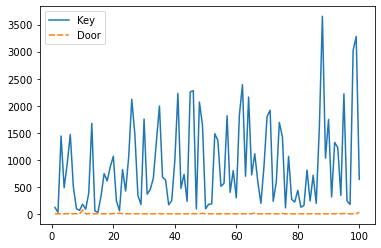

In [182]:
print(sarkey)
print(sarkeysteps)

plt.figure()
g3 = sns.lineplot(data=sarkey)

     Key  Door  Goal
1     30    27   367
2      6   127   194
3     66     4   176
4     35    70    47
5     33   130    74
6     76   103    99
7     43    48    53
8     55    65    69
9     11    93    22
10    21    54   182
11    98     7   409
12    17    73    88
13    51    77   208
14    31    18   458
15    15    35    93
16    44    59   162
17   123    15   200
18    48    44    86
19    24    21   105
20   188    40   471
21    11    32    88
22    52    21   148
23    50    56    81
24    83    19   104
25    78     4    99
26    18    19   118
27    82    32   141
28   141    76   208
29    23   125   135
30    36   236   326
31    27    14    38
32    20   134   180
33    23     9    82
34    10    11   187
35    66    43   503
36    31    40   311
37    44    18   238
38    99     8   728
39    96    39   112
40    40    60    94
41    34    32    95
42    16    56   161
43    32    27   399
44   107    63   129
45    10   234    82
46    51   101   371
47   126    2

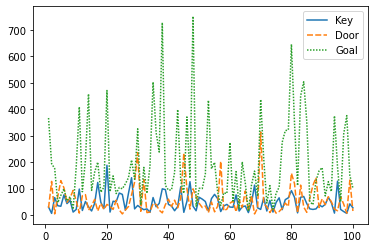

In [160]:
print(qlkey)

plt.figure()
g3 = sns.lineplot(data=qlkey)

      Key  Door  Goal
1      32     0    32
2      41     0    41
3      50     0    50
4     546     0   546
5      56     0    56
6     143     0   143
7     188     0   188
8     292     0   292
9     100     0   100
10     68     0    68
11     39     0    39
12    101     0   101
13     45     0    45
14     30     0    30
15     82     0    82
16    168     0   168
17     48     0    48
18    180     0   180
19     43     0    43
20     37     0    37
21    103     0   103
22     68     0    68
23     77     0    77
24     76     0    76
25    155     0   155
26     24     0    24
27     40     0    40
28     45     0    45
29     57     0    57
30    113     0   113
31    247     0   247
32     39     0    39
33     94     0    94
34     20     0    20
35    173     0   173
36     70     0    70
37    374     0   374
38     86     0    86
39     43     0    43
40    150     0   150
41    103     0   103
42    144     0   144
43    120     0   120
44    215     0   215
45    108 

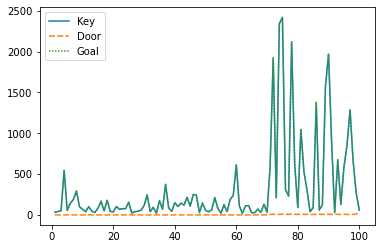

In [161]:
print(tdkey)

plt.figure()
g3 = sns.lineplot(data=tdkey)